<a href="https://colab.research.google.com/github/chrisaMel/Machine-Learning/blob/BitCoin-Predictor/BitCoinApallaktiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

#Εισαγωγή του αρχείου
uploaded = files.upload()


Saving BTC_USD Bitfinex Historical Data LargeDataset.csv to BTC_USD Bitfinex Historical Data LargeDataset (2).csv


In [ ]:
import pandas as pd

#Διάβασμα του αρχείου και εμφάνηση των 5 πρώτων στηλών
df = pd.read_csv('BTC_USD Bitfinex Historical Data LargeDataset.csv')
df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2022,"47,755.0","46,218.0","47,954.0","46,215.0",2.18K,3.33%
1,01/02/2022,"47,314.0","47,755.0","47,980.0","46,698.0",1.84K,-0.92%
2,01/03/2022,"46,445.0","47,314.0","47,578.0","45,701.0",2.58K,-1.84%
3,01/04/2022,"45,830.0","46,445.0","47,546.0","45,583.0",3.79K,-1.32%
4,01/05/2022,"43,418.0","45,830.0","47,056.7","42,519.0",6.93K,-5.26%


In [ ]:
#Μετατροπή των δεδομένων σε αριθμητική μορφή και μετατροπή της μεταβλητής date σε ημερομηνία

# Αντικατάσταση κόμματος με τελεία και μετατροπή σε float
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Vol.'] = df['Vol.'].str.replace('K', 'e3').str.replace(',', '').astype(float)

# Αφαίρεση του % και μετατροπή της στήλης Change % σε float
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

#Μετατροπή της στήλης Date σε τύπο ημερομηνίας
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)


# Έλεγχος ότι έγιναν οι επιθυμητές αλλαγές
print(df.info())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1097 entries, 2022-01-01 to 2025-01-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1097 non-null   float64
 1   Open      1097 non-null   float64
 2   High      1097 non-null   float64
 3   Low       1097 non-null   float64
 4   Vol.      1097 non-null   float64
 5   Change %  1097 non-null   float64
dtypes: float64(6)
memory usage: 60.0 KB
None


In [ ]:
!pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=e146ef428aaea7e6613358ffaab7f33c2ed63bd150a64fbccb612b61a527483e
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
#Υπολογισμός των τεχνικών δεικτών ΜΑ_10 RSI ROC OBV
import pandas_ta as ta

# 10-ημερών κινητός μέσος όρος
df['MA_10'] = df['Price'].rolling(window=10).mean()

# Υπολογισμός RSI (14 ημερών)
df['RSI'] = ta.rsi(df['Price'], length=14)

# Υπολογισμός ROC (10 ημερών)
df['ROC'] = ta.roc(df['Price'], length=10)

# Υπολογισμός OBV
df['OBV'] = ta.obv(df['Price'], df['Vol.'])

# Εμφάνιση του αποτελέσματος
print('Όλα τα δεδομένα \n',df)


Όλα τα δεδομένα 
               Price     Open     High      Low    Vol.  Change %    MA_10  \
Date                                                                        
2022-01-01  47755.0  46218.0  47954.0  46215.0  2180.0      3.33      NaN   
2022-01-02  47314.0  47755.0  47980.0  46698.0  1840.0     -0.92      NaN   
2022-01-03  46445.0  47314.0  47578.0  45701.0  2580.0     -1.84      NaN   
2022-01-04  45830.0  46445.0  47546.0  45583.0  3790.0     -1.32      NaN   
2022-01-05  43418.0  45830.0  47056.7  42519.0  6930.0     -5.26      NaN   
...             ...      ...      ...      ...     ...       ...      ...   
2024-12-28  95533.0  94419.0  95854.0  94311.0   290.0      1.18  96678.5   
2024-12-29  93944.0  95533.0  95556.0  93199.0   590.0     -1.66  96321.4   
2024-12-30  92982.0  93944.0  95130.0  91696.0  1820.0     -1.02  95833.9   
2024-12-31  93780.0  92982.0  96400.0  92175.0  1120.0      0.86  95483.0   
2025-01-01  94757.0  93780.0  95282.0  93131.0   550.0    

In [ ]:
# Έλεγχος για ελλιπείς τιμές και αριθμός δειγμάτων
missing_values = df.isnull().sum()
print("Ελλιπείς τιμές ανά στήλη:\n", missing_values)

#Εμφανιση του μεγέθους του dataset
print("Αριθμός γραμμών (δειγμάτων):", df.shape[0])
print("Αριθμός στηλών (χαρακτηριστικών):", df.shape[1])

#Αφαίρεση των τιμών NaN από το dataset και εμφάνιση ξανα των χαμένων τιμών για επιβεβαίωση
df = df.dropna()
print("Ελλιπείς τιμές ανά στήλη:\n", df.isnull().sum())

#Εμφάνιση του τελικού μεγέθους του dataset
print("Αριθμός γραμμών (δειγμάτων):", df.shape[0])
print("Αριθμός στηλών (χαρακτηριστικών):", df.shape[1])

Ελλιπείς τιμές ανά στήλη:
 Price        0
Open         0
High         0
Low          0
Vol.         0
Change %     0
MA_10        9
RSI         14
ROC         10
OBV          0
dtype: int64
Αριθμός γραμμών (δειγμάτων): 1097
Αριθμός στηλών (χαρακτηριστικών): 10
Ελλιπείς τιμές ανά στήλη:
 Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
MA_10       0
RSI         0
ROC         0
OBV         0
dtype: int64
Αριθμός γραμμών (δειγμάτων): 1083
Αριθμός στηλών (χαρακτηριστικών): 10


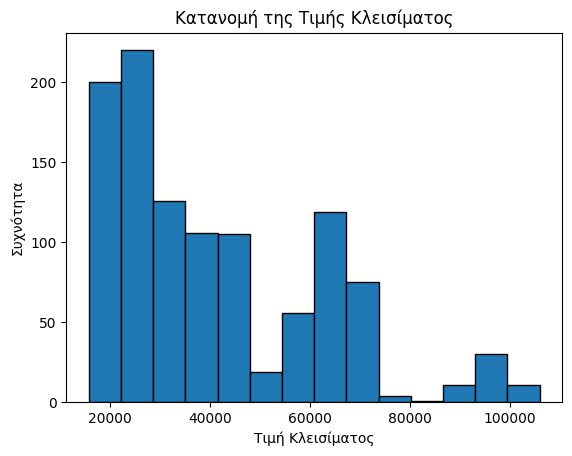

In [ ]:
# Έλεγχος κατανομής
import matplotlib.pyplot as plt

# Ιστόγραμμα της τιμής κλεισίματος

plt.hist(df['Price'], bins=14, edgecolor='black')
plt.title('Κατανομή της Τιμής Κλεισίματος')
plt.xlabel('Τιμή Κλεισίματος')
plt.ylabel('Συχνότητα')
plt.show()


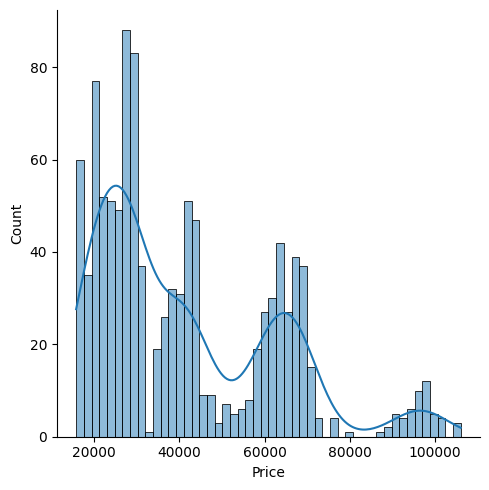

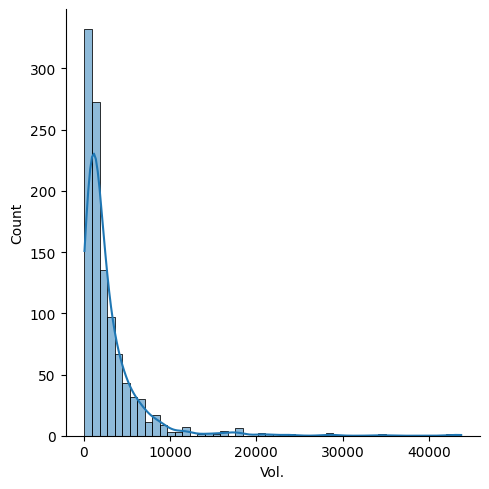

In [ ]:
#έλεγχος κατανομής της τιμής και του όγκου αγορών
import seaborn as sns

sns.displot( df['Price'], kde = True, bins = 50 )

sns.displot( df['Vol.'], kde = True, bins = 50 )



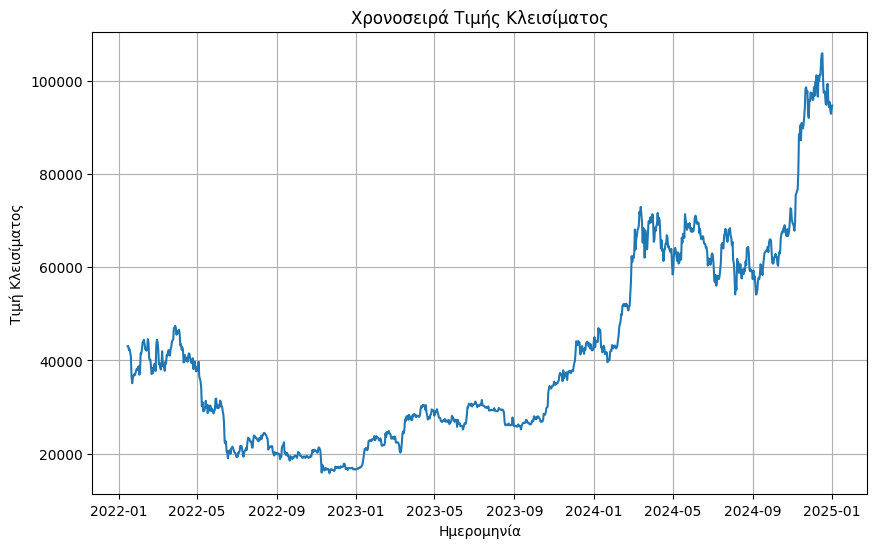

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'])
plt.title('Χρονοσειρά Τιμής Κλεισίματος')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή Κλεισίματος')
plt.grid(True)
plt.show()


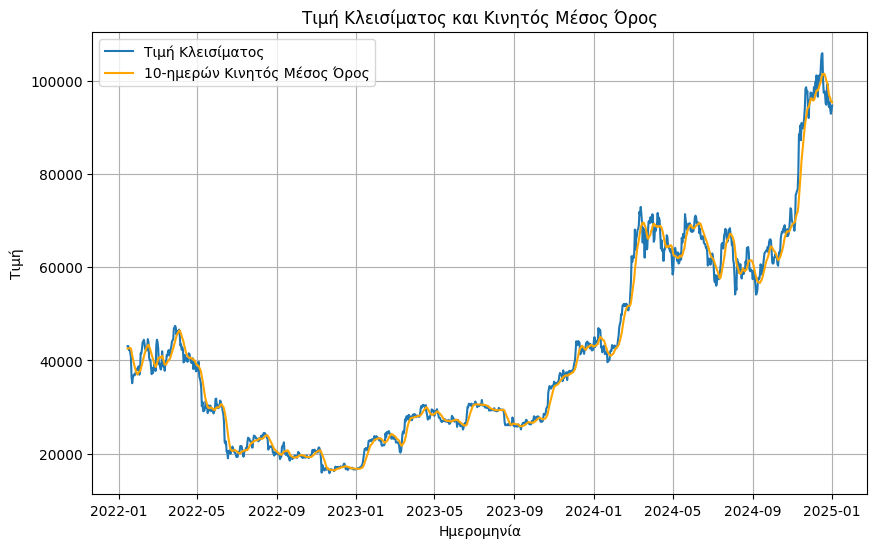

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Τιμή Κλεισίματος')
plt.plot(df.index, df['MA_10'], label='10-ημερών Κινητός Μέσος Όρος', color='orange')
plt.title('Τιμή Κλεισίματος και Κινητός Μέσος Όρος')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
from sklearn.preprocessing import MinMaxScaler


# Εμφάνιση βασικών στατιστικών για κάθε αριθμητική στήλη
print("\nΒασικά στατιστικά στοιχεία για κάθε στήλη:")
print(df.describe())

# Δημιουργία scaler
scaler = MinMaxScaler()

# Κανονικοποίηση όλων των αριθμητικών στηλών
scaled_data = scaler.fit_transform(df)

# Δημιουργία νέου dataframe με τα κανονικοποιημένα δεδομένα
df = pd.DataFrame(scaled_data, columns=df.columns)

print("Κανονικοποιημένα δεδομένα με Min-Max Scaling:")
print(df.head())



Βασικά στατιστικά στοιχεία για κάθε στήλη:
               Price           Open           High            Low  \
count    1083.000000    1083.000000    1083.000000    1083.000000   
mean    41064.934441   41017.439797   41839.329548   40204.622253   
std     20942.356511   20878.456602   21322.449557   20460.862355   
min     15766.000000   15766.000000   16279.000000   15501.000000   
25%     24442.500000   24442.500000   25201.500000   24112.000000   
50%     34669.000000   34669.000000   35175.000000   34079.000000   
75%     59345.000000   59304.000000   60724.000000   58042.500000   
max    105990.000000  106000.000000  108080.000000  105160.000000   

               Vol.     Change %          MA_10          RSI          ROC  \
count   1083.000000  1083.000000    1083.000000  1083.000000  1083.000000   
mean    2768.476454     0.113176   40849.028994    52.402403     1.173628   
std     3770.018384     2.842161   20590.849293    13.825426     9.241606   
min       90.000000   -15.

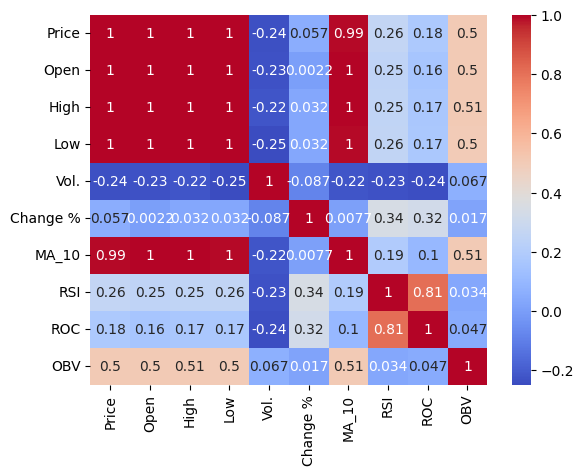


Original Dataset:
      Price      Open      High       Low      Vol.  Change %     MA_10  \
0  0.302613  0.302824  0.299855  0.302245  0.071232  0.518064  0.307272   
1  0.302780  0.302580  0.296380  0.302377  0.034127  0.520716  0.307240   
2  0.293447  0.302746  0.293156  0.290735  0.064819  0.455088  0.308090   
3  0.295088  0.293204  0.287611  0.287790  0.097343  0.531323  0.308924   
4  0.287174  0.295055  0.286513  0.286407  0.145671  0.464037  0.308720   

        RSI       ROC       OBV  
0  0.294209  0.489465  0.797928  
1  0.296322  0.499427  0.805045  
2  0.234808  0.523706  0.791892  
3  0.256762  0.523197  0.811441  
4  0.208715  0.494681  0.782387  

Training Features Dataset:
       Vol.  Change %     MA_10       RSI       ROC       OBV
0  0.071232  0.518064  0.307272  0.294209  0.489465  0.797928
1  0.034127  0.520716  0.307240  0.296322  0.499427  0.805045
2  0.064819  0.455088  0.308090  0.234808  0.523706  0.791892
3  0.097343  0.531323  0.308924  0.256762  0.52319

In [61]:
#ελεγχος για διαγραφη καποιων μεταβλητων απο το dataset λόγο μεγάλης συσχέτησης

#οπτικοποίηση συσχετησης
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()
# Αποθήκευση αρχικού dataset και αφαίρεση των  Price, Open, High και Low απο το τελικό dataset
OG_dataset = df.copy()

# Αφαίρεση των χαρακτηριστικών Price, Open, High, Low και Date από το dataset εκπαίδευσης
Final_dt = df.drop(columns=["Price", "Open", "High", "Low"])

# Εμφάνιση των δύο datasets
print("\nOriginal Dataset:")
print(OG_dataset.head())

print("\nTraining Features Dataset:")
print(Final_dt.head())